# Milestone 1 Phase 2

# Introduction

Author : Delfi Kusuma Wardhani

H8 FTDS 002

## Dataset Description

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

| Column Name | Description |
|:---|:--- |
| customerID | Customer ID |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service)
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |

## Objectives
Create the best model to predict the status of customer retention in a Telco company

# Import Library

In [1]:
# Common Import
import pandas as pd
import numpy as np

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Data Preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Training Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation

# Evaluation

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Data Loading

In [3]:
# Read CSV File
df = pd.read_csv('Telco-Customer-Churn.csv')
# Show the first five rows of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning and Preprocessing (for EDA)

In [4]:
# Set customerID as index
df.set_index(['customerID'], inplace=True)

In [5]:
# Show the unique values from each columns
for col in df.columns:
  print(col,"==>",df[col].unique())

gender ==> ['Female' 'Male']
SeniorCitizen ==> [0 1]
Partner ==> ['Yes' 'No']
Dependents ==> ['No' 'Yes']
tenure ==> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ==> ['No' 'Yes']
MultipleLines ==> ['No phone service' 'No' 'Yes']
InternetService ==> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ==> ['No' 'Yes' 'No internet service']
OnlineBackup ==> ['Yes' 'No' 'No internet service']
DeviceProtection ==> ['No' 'Yes' 'No internet service']
TechSupport ==> ['No' 'Yes' 'No internet service']
StreamingTV ==> ['No' 'Yes' 'No internet service']
StreamingMovies ==> ['No' 'Yes' 'No internet service']
Contract ==> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ==> ['Yes' 'No']
PaymentMethod ==> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges =

For some features, like OnlineSecurity, MultipleLines, OnlineBackup, DeviceProtection, and some others, there are 2 unique values that have the same meaning ('No internet service' and 'No'). Therefor, we will simplify the feature cardinality by replacing the 'No internet service' and 'No phone service' as a 'No' value.

In [6]:
# Replacing values
df.replace('No internet service', 'No', inplace = True)
df.replace('No phone service', 'No', inplace = True)

Now, let's check again the unique values

In [7]:
# Check on updated unique values
for col in df.columns:
  print(col,"==>",df[col].unique())

gender ==> ['Female' 'Male']
SeniorCitizen ==> [0 1]
Partner ==> ['Yes' 'No']
Dependents ==> ['No' 'Yes']
tenure ==> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ==> ['No' 'Yes']
MultipleLines ==> ['No' 'Yes']
InternetService ==> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ==> ['No' 'Yes']
OnlineBackup ==> ['Yes' 'No']
DeviceProtection ==> ['No' 'Yes']
TechSupport ==> ['No' 'Yes']
StreamingTV ==> ['No' 'Yes']
StreamingMovies ==> ['No' 'Yes']
Contract ==> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ==> ['Yes' 'No']
PaymentMethod ==> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges ==> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ==> ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ==> ['No' 'Yes']


In [ ]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

There is an anomaly data type in the dataset. We know that TotalCharges is a feature containing numbers, but the dataset info shows that it is an object. So, if we take a look closely at the TotalCharges feature, it contains the value of ' ' or a missing value.

In [8]:
# See the value inside TotalCharges feature
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# Show rows with missing TotalCharges values
df[df.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No


In [10]:
# Replace the missing value into nan
df['TotalCharges'].replace(to_replace = ' ', value= 0, inplace = True)

After we drop the missing values, we change the data type into float numeric data

In [11]:
# Change data type of TotalCharges feature
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
# Checking on other missing values in dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Check on duplicated data
df.duplicated().sum()

22

We have 22 rows of duplicated data, then we'll drop them

In [13]:
# Drop the duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA)

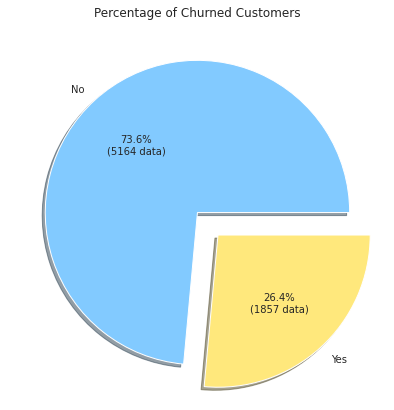

In [14]:
# Fungsi untuk menampilkan jumlah data sebenarnya ke dalam pie chart
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} data)".format(pct, absolute)
    
colors = ["#82CAFF", "#FFE87C"]
labels = df['Churn'].unique()
explode=[0,0.2]

# Menampilkan pie chart
plt.figure(figsize=(10,7))
plt.title('Percentage of Churned Customers')
plt.pie(df['Churn'].value_counts(), autopct=lambda pct: func(pct, df['Churn'].value_counts()), 
        colors=colors, explode=explode, shadow=True, labels=labels)
plt.show()

From all customers recorded on the dataset, around 26% of them are stopped using the service (churn).

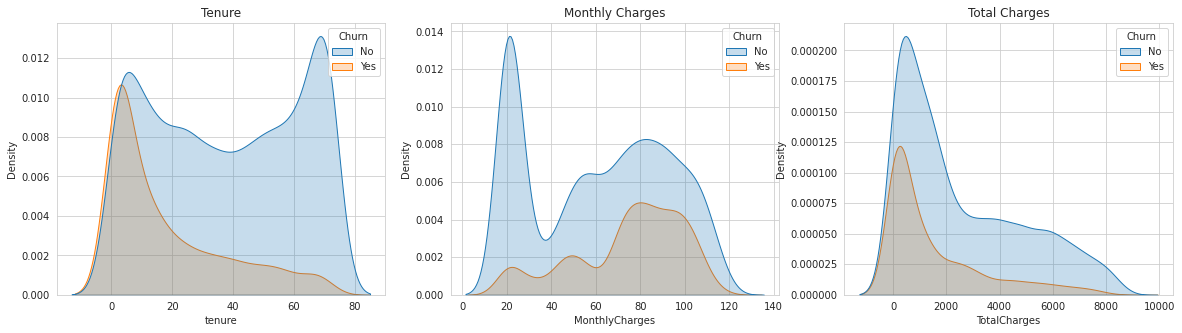

In [15]:
# Show data distribution of Tenure, Monthly Charges, and Total Charges
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Tenure')
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)

plt.subplot(1,3,2)
plt.title('Monthly Charges')
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)

plt.subplot(1,3,3)
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title('Total Charges')
plt.show()

- If we look at how long the customers have been using the services, the old customers are more loyal rather than the new customers.
- And if we look at the monthly and total charges, the customers with low monthly and total charges are mostly loyal. But, many customers with high monthly charges are churned.

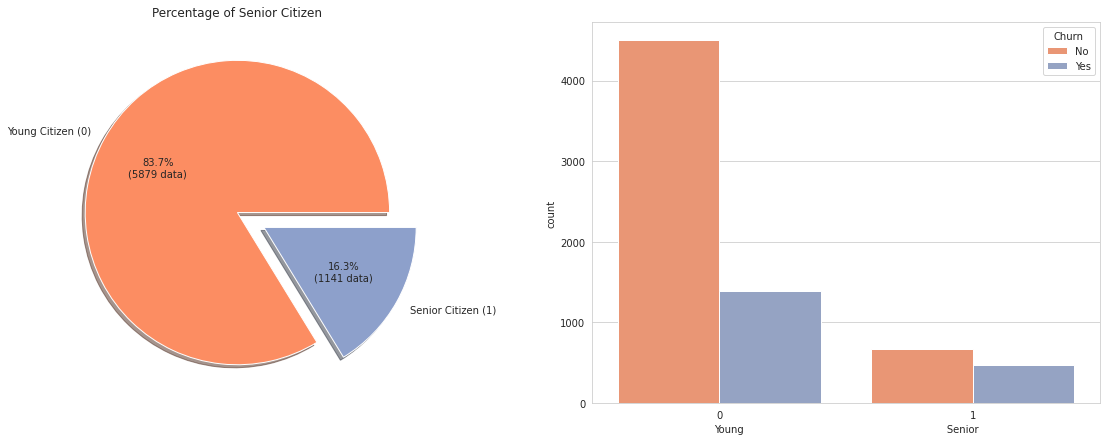

In [ ]:
# Variabel yang digunakan untuk pie chart
colors = sns.color_palette('Set2')[1:5]
labels = ['Young Citizen (0)', 'Senior Citizen (1)']
explode=[0,0.2]

# Menampilkan pie chart
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Percentage of Senior Citizen')
plt.pie(df['SeniorCitizen'].value_counts(), autopct=lambda pct: func(pct, df['SeniorCitizen'].value_counts()), 
        colors=colors, labels=labels, shadow=True, explode=explode)

plt.subplot(1,2,2)
sns.countplot(x="SeniorCitizen", data=df,
                   hue="Churn", palette=colors)
plt.xlabel("Young                                                                 Senior")
plt.show()

From all customers, around 16% of them are senior citizen. 

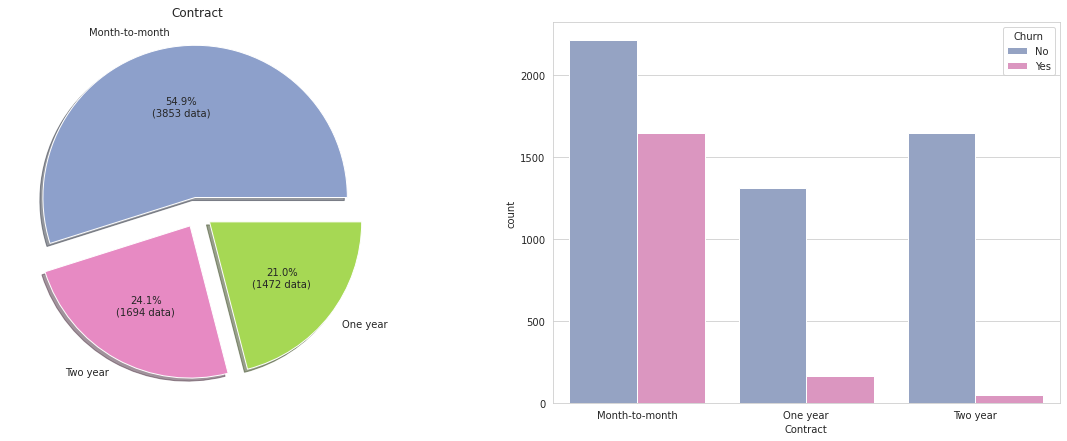

In [ ]:
# Variabel yang digunakan untuk pie chart
colors = sns.color_palette('Set2')[2:5]
labels = ['Month-to-month', 'Two year', 'One year']
explode=[0.1,0.1,0.1]

# Menampilkan pie chart
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Contract')
plt.pie(df['Contract'].value_counts(), autopct=lambda pct: func(pct, df['Contract'].value_counts()), 
        colors=colors, labels=labels, shadow=True, explode=explode)

plt.subplot(1,2,2)
sns.countplot(x="Contract", data=df,
                   hue="Churn", palette=colors)

plt.show()

Most of the customers have short-term contracts with the services, and these customers tend to churn compared to the customers with long-term contract.

<Figure size 1440x288 with 0 Axes>

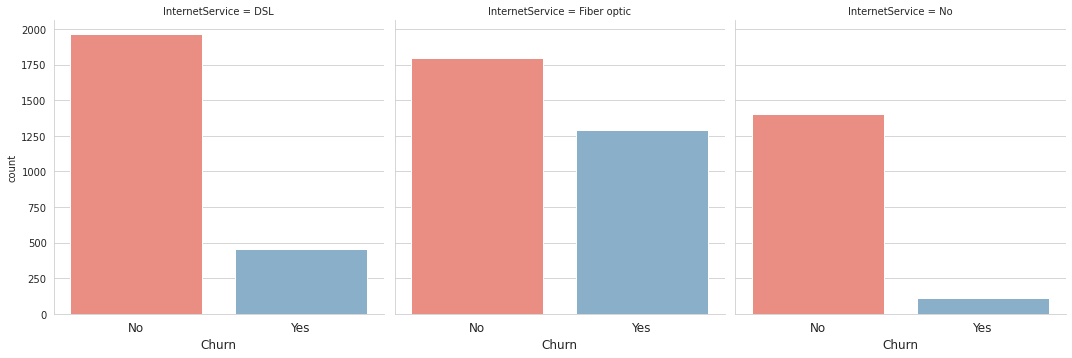

In [16]:
colors = sns.color_palette('Set3')[3:5]
plt.figure(figsize=(20,4))
a=sns.catplot(x="Churn", col="InternetService", data=df, kind="count", palette=colors)
a.set_xlabels(fontsize=12)
a.set_xticklabels(fontsize=12)
plt.show()

<Figure size 1440x360 with 0 Axes>

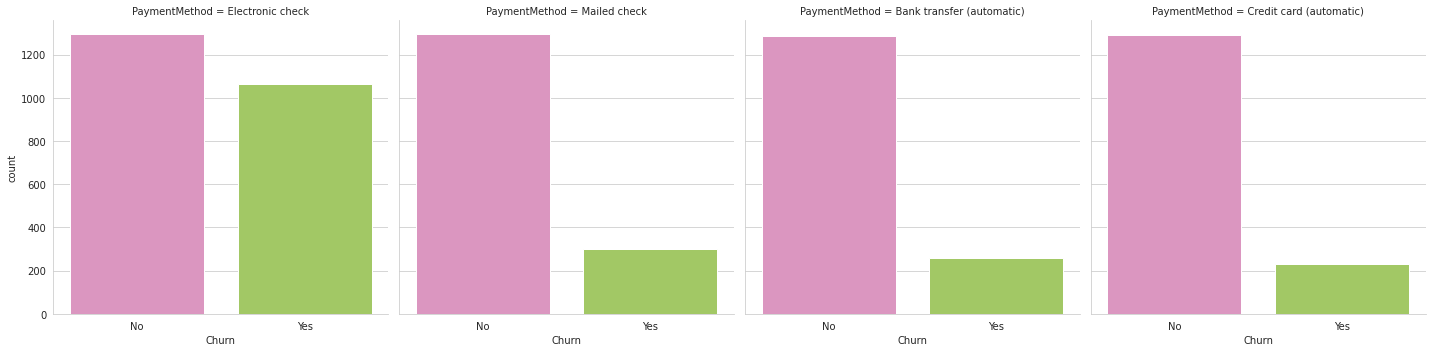

In [ ]:
colors = sns.color_palette('Set2')[3:5]
plt.figure(figsize=(20,5))
sns.catplot(x="Churn", col="PaymentMethod", data=df, kind="count", palette=colors)
plt.show()

There are customers whose payment method is by electronic check, mailed check, bank transfer (automatic), and credit card (automatic). The customers who churn the most are they whose payment method is by electronic check.

- The customers with internetService option fiber optic has the highest churn rate compared to other options

In [22]:
z=df[['PaymentMethod', 'InternetService', 'Churn']]
w=z[z['PaymentMethod']=='Electronic check']
w['InternetService'].value_counts()

Fiber optic    1590
DSL             647
No              122
Name: InternetService, dtype: int64

The customers who pays with electronic check method mostly subscribe the fiber optic kind of service

# Data Preprocessing for Modelling

Now we will use this dataset to train a model which could predict whether the customer will churn or not.

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


First, we prepare the pipeline consist of some functions to preprocess the data

## The pipelines

In [ ]:
# Create pipelines
# Pipeline for categorical features
cat_pipe = Pipeline(steps=[
            ('le', LabelEncoder()),
            ('ohe', OneHotEncoder())])
# Pipeline for numerical features
num_pipe = Pipeline(steps=[
            ('scale', StandardScaler())])

In [ ]:
# Encode the target column
df['Churn'] = cat_pipe.named_steps['le'].fit_transform(df['Churn'])

In [ ]:
df.Churn.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

0 = stay,

1 = churn

So, the 0 value means the customer will stay, and 1 value means the customer will churn

In [ ]:
# Separate features and target
X = df.drop(['Churn'], axis=1)
y = df['Churn']

After separating the features and the target, we will preprocess the features data. Starting by encoding all the categorical features

## Encoding

In [ ]:
# Numerical features
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
# Features that need one-hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] 
# Features that need label encoding
cat_cols_le = list(set(X.columns)- set(num_cols) - set(cat_cols_ohe)) 

In [ ]:
# Transform features with label encoder
for col in cat_cols_le:
    X[col] = cat_pipe.named_steps['le'].fit_transform(X[col])

In [ ]:
# Transform features with one hot encoder
ohe_cols= cat_pipe.named_steps['ohe'].fit_transform(X[cat_cols_ohe])

In [ ]:
# Convert the transformed features into array
ohe_cols = ohe_cols.toarray()

In [ ]:
# Make a dataframe consists of the transformed features (ohe)
kolom = cat_pipe.named_steps['ohe'].get_feature_names()
kolom_ohe = pd.DataFrame(ohe_cols, columns=kolom)
kolom_ohe

,x0_Bank transfer (automatic),x0_Credit card (automatic),x0_Electronic check,x0_Mailed check,x1_Month-to-month,x1_One year,x1_Two year,x2_DSL,x2_Fiber optic,x2_No
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7016,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7017,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7019,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Replace the features with the transformed features
X.drop(columns=cat_cols_ohe, inplace=True)
X.reset_index(inplace=True)
X = pd.concat([X, kolom_ohe], axis=1)

In [ ]:
X.set_index(['customerID'], inplace=True)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,x0_Bank transfer (automatic),x0_Credit card (automatic),x0_Electronic check,x0_Mailed check,x1_Month-to-month,x1_One year,x1_Two year,x2_DSL,x2_Fiber optic,x2_No
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2234-XADUH,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4801-JZAZL,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Data Split

In [ ]:
# Split the dat into train data, validation data, and test data
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.30, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_tes, y_tes, test_size=0.25, random_state=42)

print("Total data train : ", len(X_train))
print("Total data validation :", len(X_valid))
print("Total data test  : ", len(X_test))

Total data train :  4914
Total data validation : 1580
Total data test  :  527


## Data Scale

In [ ]:
# Scale the data
X_train = num_pipe.named_steps['scale'].fit_transform(X_train)
X_valid = num_pipe.named_steps['scale'].transform(X_valid)
X_test = num_pipe.named_steps['scale'].transform(X_test)

## Data Shuffle and Batching

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

## Shuffle and slice train dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
validation_dataset = validation_dataset.shuffle(buffer_size=1024).batch(64)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

In [ ]:
train_dataset

<BatchDataset shapes: ((None, 26), (None,)), types: (tf.float64, tf.int64)>

# Modelling

In this part, we will try to train the features with 2 kinds of model :
- Sequential API
- Functional API

## Sequential API

In [ ]:
# Creating the architecture model of sequential
model1 = Sequential()
model1.add(keras.layers.Flatten(input_shape=[26]))
model1.add(Dense(13, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
# Summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 26)                0         
_________________________________________________________________
dense (Dense)                (None, 13)                351       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


The model consist of input layer (which is a flatten layer), one hidden layer, and one output layer that only consist of 1 unit (because it's a binary classification)

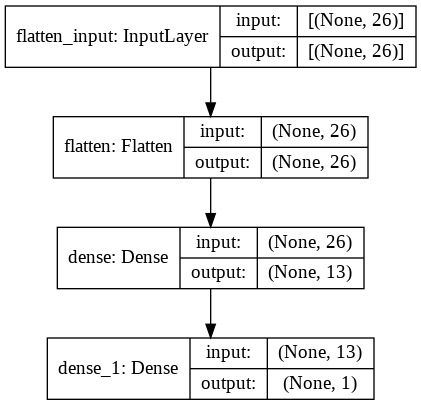

In [ ]:
keras.utils.plot_model(model1, "my_seq_model.png", show_shapes=True)

The picture above is the visualization from model architecture of the sequential model

In [ ]:
# Metrics to measure the performance
metrics = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.AUC(name='auc')
      ]

In [ ]:
# Compile the model
model1.compile(loss='binary_crossentropy',
              metrics=metrics)

In [ ]:
# Train the model
history_sequential = model1.fit(train_dataset,
              epochs=50, validation_data=validation_dataset,
          batch_size=24)

Epoch 1/50
77/77 [==============================] - 1s 5ms/step - loss: 0.5375 - accuracy: 0.7057 - auc: 0.7190 - val_loss: 0.4794 - val_accuracy: 0.7519 - val_auc: 0.7929
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7629 - auc: 0.8014 - val_loss: 0.4530 - val_accuracy: 0.7627 - val_auc: 0.8154
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7753 - auc: 0.8180 - val_loss: 0.4439 - val_accuracy: 0.7753 - val_auc: 0.8227
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7863 - auc: 0.8267 - val_loss: 0.4388 - val_accuracy: 0.7810 - val_auc: 0.8271
Epoch 5/50
77/77 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.7945 - auc: 0.8325 - val_loss: 0.4359 - val_accuracy: 0.7835 - val_auc: 0.8294
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7977 - auc: 0.8360 - val_loss: 0.4345 - val_acc

## Functional API

In [ ]:
keras.backend.clear_session()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

Since we create the model with functional API, let's try having 2 input layers

In [ ]:
# Split the input into 2 separated layers
X_train_A, X_train_B = X_train[:, :13], X_train[:, 13:]
X_valid_A, X_valid_B = X_valid[:, :13], X_valid[:, 13:]
X_test_A, X_test_B = X_test[:, :13], X_test[:, 13:]
X_new_A, X_new_B = X_test_A[:5], X_test_B[:5]

In [ ]:
# Arrange the desired layers for the model architecture
input_A = keras.layers.Input(shape=[13], name="1sthalf_input")
input_B = keras.layers.Input(shape=[13], name="2ndhalf_input")
concat = keras.layers.concatenate([input_A, input_B])
hidden1 = keras.layers.Dense(52, activation="relu")(concat)
hidden2 = keras.layers.Dense(26, activation="relu")(hidden1)
output = keras.layers.Dense(1, name="output", activation='sigmoid')(hidden2)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
# Model Summary
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
1sthalf_input (InputLayer)      [(None, 13)]         0                                            
__________________________________________________________________________________________________
2ndhalf_input (InputLayer)      [(None, 13)]         0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 26)           0           1sthalf_input[0][0]              
                                                                 2ndhalf_input[0][0]              
__________________________________________________________________________________________________
dense (Dense)                   (None, 52)           1404        concatenate[0][0]            

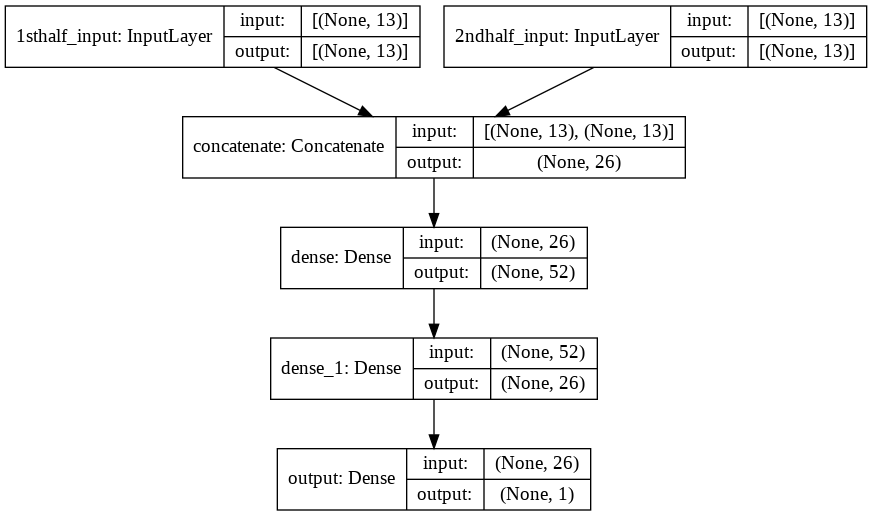

In [ ]:
# Show the visualization of the model
keras.utils.plot_model(model2, "my_func_model.png", show_shapes=True)

In [ ]:
# Compile the model
model2.compile(loss="binary_crossentropy",
              metrics=metrics)

In [ ]:
# Train the model
history_func = model2.fit((X_train_A, X_train_B), y_train, epochs=50,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/50
154/154 [==============================] - 1s 4ms/step - loss: 0.3154 - accuracy: 0.8380 - auc: 0.8986 - val_loss: 0.5077 - val_accuracy: 0.7804 - val_auc: 0.8071
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8561 - auc: 0.9212 - val_loss: 0.5102 - val_accuracy: 0.7728 - val_auc: 0.8066
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8624 - auc: 0.9223 - val_loss: 0.5078 - val_accuracy: 0.7785 - val_auc: 0.8074
Epoch 4/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8610 - auc: 0.9227 - val_loss: 0.5161 - val_accuracy: 0.7690 - val_auc: 0.7992
Epoch 5/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8594 - auc: 0.9239 - val_loss: 0.5138 - val_accuracy: 0.7722 - val_auc: 0.7998
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8630 - auc: 0.9251 - val_loss: 0.51

# Model Evaluation

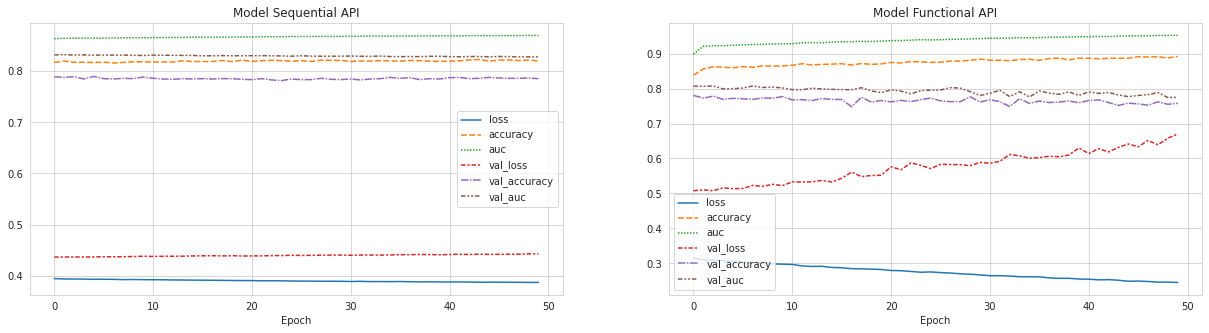

In [ ]:
# Show the training result graph
A = pd.DataFrame(history_sequential.history)
B = pd.DataFrame(history_func.history)

plt.figure(figsize=(21,5))
plt.subplot(1,2,1)
plt.title('Model Sequential API')
sns.lineplot(data=A)
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.title('Model Functional API')
sns.lineplot(data=B)
plt.xlabel('Epoch')
plt.show()

The loss and accuracy from functional API model seem better than the sequential. However, it looks like there's an overfitting condition in the functional API model, because the train and validation result are much different.

In [ ]:
# Evaluate Sequential model on test data
m1_loss, m1_accu, m1_auc = model1.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.7913 - auc: 0.8409


In [ ]:
# Evaluate Functional model on test data
m2_loss, m2_accu, m2_auc = model2.evaluate((X_test_A, X_test_B), (y_test, y_test))

17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7723 - auc: 0.7864


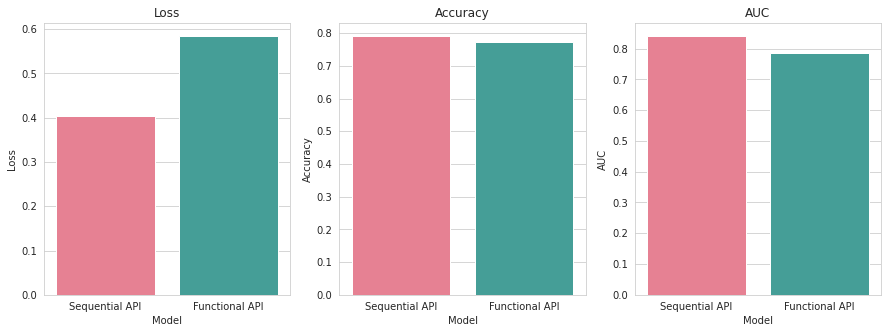

In [ ]:
# Evaluation 1
eval1 = pd.DataFrame({'Model' : ["Sequential API", "Functional API"],
                      'Loss' : [m1_loss, m2_loss],
                      'Accuracy' : [m1_accu, m2_accu],
                      'AUC' : [m1_auc, m2_auc]})

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Loss')
sns.barplot(data=eval1, x='Model', y='Loss', palette='husl')
plt.subplot(1,3,2)
plt.title('Accuracy')
sns.barplot(data=eval1, x='Model', y='Accuracy', palette='husl')
plt.subplot(1,3,3)
plt.title('AUC')
sns.barplot(data=eval1, x='Model', y='AUC', palette='husl')
plt.show()

- The sequential model reached slightly higher score of accuracy and AUC. 
- Also, the loss from functional API is higher than the sequential

# Model Improvement

## Hyperparameter Tuning with Keras Tuner-Hyperband

Now, we will try to improve both of the model by tuning their hyperparameters using Keras Tuner

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 6.2 MB/s 


In [ ]:
import keras_tuner as kt

### Parameter Tuning for Sequential API Model

In [ ]:
keras.backend.clear_session()

In [ ]:
input_shape = X_train.shape[1]

In [ ]:
# Create function for building the model with desired parameter options, and compile the model
def model_builder(hp):
  model = keras.Sequential()
  model.add(Dense(26, input_dim=input_shape, activation='relu'))

  # Tune the number of units in the first Dense layer
  hp_units1 = hp.Int('units1', min_value=26, max_value=520, step=26)
  model.add(keras.layers.Dense(units=hp_units1, activation='relu'))

  hp_rate = hp.Choice('dropout_rate', values=[0.2, 0.3])
  model.add(keras.layers.Dropout(hp_rate))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  # Choose optimizer
  adam = keras.optimizers.Adam(learning_rate=hp_learning_rate)
  adadelta = keras.optimizers.Adadelta(learning_rate=hp_learning_rate)
  nadam = keras.optimizers.Nadam(learning_rate=hp_learning_rate)
  adamax = keras.optimizers.Adamax(learning_rate=hp_learning_rate)
  hp_optimizer = hp.Choice('optimizer', values=['adam','nadam','adadelta', 'adamax'])

  # Compile the model
  model.compile(optimizer=hp_optimizer,
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model

In [ ]:
# Define the tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     directory='my_dir',
                     project_name='kt11')

In [ ]:
# Train the model along with the tuner
tuner.search(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is {best_hps.get('units1')}, 
the optimal rate for dropout is {best_hps.get('dropout_rate')} and 
the optimal optimizer is {best_hps.get('optimizer')} with the optimal learning rate {best_hps.get('learning_rate')}.
""")

Trial 90 Complete [00h 00m 21s]
val_accuracy: 0.7892404794692993

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 00h 09m 12s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is 520, 
the optimal rate for dropout is 0.3 and 
the optimal optimizer is adamax with the optimal learning rate 0.0001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4778 - accuracy: 0.7707 - auc: 0.7882 - val_loss: 0.4534 - val_accuracy: 0.7753 - val_auc: 0.8132
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7916 - auc: 0.8220 - val_loss: 0.4452 - val_accuracy: 0.7791 - val_auc: 0.8213
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7961 - auc: 0.8313 - val_loss: 0.4410 - val_accuracy: 0.7810 - val_auc: 0.8254
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7971 - auc: 0.8372 - val_loss: 0.4389 - val_accuracy: 0.7899 - val_auc: 0.8276
Epoch 5/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8008 - auc: 0.8389 - val_loss: 0.4372 - val_accuracy: 0.7861 - val_auc: 0.8296
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8046 - auc: 0.8434 - val_loss: 0.43

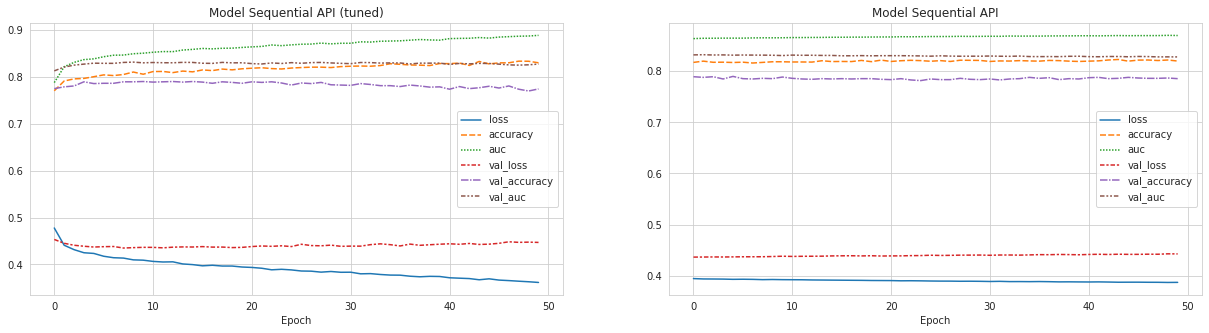

In [ ]:
# Show training graph
C = pd.DataFrame(history.history)

plt.figure(figsize=(21,5))
plt.subplot(1,2,1)
plt.title('Model Sequential API (tuned)')
sns.lineplot(data=C)
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.title('Model Sequential API')
sns.lineplot(data=A)
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Evaluate on test data
m3_loss, m3_accu, m3_auc = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7989 - auc: 0.8366


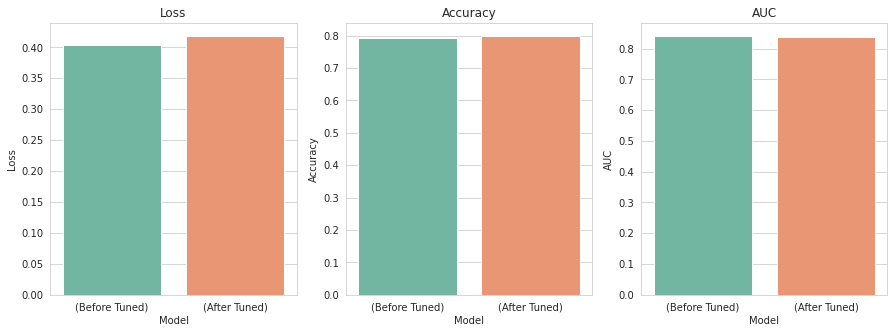

In [ ]:
# The improvement of Sequential API model
imp1 = pd.DataFrame({'Model' : ["(Before Tuned)", "(After Tuned)"],
                      'Loss' : [m1_loss, m3_loss],
                      'Accuracy' : [m1_accu, m3_accu],
                      'AUC' : [m1_auc, m3_auc]})

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Loss')
sns.barplot(data=imp1, x='Model', y='Loss', palette='Set2')
plt.subplot(1,3,2)
plt.title('Accuracy')
sns.barplot(data=imp1, x='Model', y='Accuracy', palette='Set2')
plt.subplot(1,3,3)
plt.title('AUC')
sns.barplot(data=imp1, x='Model', y='AUC', palette = 'Set2')
plt.show()

After improvement, the sequential model reached just slightly higher accuracy score. However, the loss is also getting higher.

### Parameter Tuning for Functional API

In [ ]:
# Create function for building the model with desired parameter options, and compile the model
def build_model(hp):
    input_A = keras.layers.Input(shape=[13], name="1sthalf_input")
    input_B = keras.layers.Input(shape=[13], name="2ndhalf_input")
    concat = keras.layers.concatenate([input_A, input_B])
    # options of units value for 1st and 2nd hidden layer
    hp_units_A = hp.Int('units_A', min_value=26, max_value=520, step=26)
    hp_units_B = hp.Int('units_B', min_value=26, max_value=520, step=26)
    a = tf.keras.layers.Dense(units=hp_units_A, activation='relu')(concat)
    b = tf.keras.layers.Dense(units=hp_units_B, activation='relu')(a)
    
    hp_rate = hp.Choice('dropout_rate', values=[0.2, 0.3])
    do = keras.layers.Dropout(hp_rate)(b)
    out = keras.layers.Dense(1, activation='sigmoid')(do)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    # Choose optimizer
    adam = keras.optimizers.Adam(learning_rate=hp_learning_rate)
    adadelta = keras.optimizers.Adadelta(learning_rate=hp_learning_rate)
    nadam = keras.optimizers.Nadam(learning_rate=hp_learning_rate)
    adamax = keras.optimizers.Adamax(learning_rate=hp_learning_rate)
    hp_optimizer = hp.Choice('optimizer', values=['adam','nadam','adadelta', 'adamax'])

    model = keras.models.Model(inputs=[input_A, input_B], outputs=[out])

    # Compile the model
    model.compile(optimizer=hp_optimizer,
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=metrics)

    return model

In [ ]:
# Define the tuner
tuner2 = kt.Hyperband(build_model, 
                     objective="val_accuracy", 
                     max_epochs=20,
                     directory='my_dir',
                     project_name='ktf7')

In [ ]:
# Train the model along with the tuner
tuner2.search((X_train_A,X_train_B), y_train, epochs=20, validation_data=((X_valid_A,X_valid_B), y_valid))

# Get the optimal hyperparameters
best_hps=tuner2.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is {best_hps.get('units_A')}, 
The optimal number of units in the second densely-connected layer is {best_hps.get('units_B')},
the optimal rate for dropout is {best_hps.get('dropout_rate')} and 
the optimal optimizer is {best_hps.get('optimizer')} with the optimal learning rate {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.7993670701980591

Best val_accuracy So Far: 0.800632894039154
Total elapsed time: 00h 02m 55s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is 208, 
The optimal number of units in the second densely-connected layer is 104,
the optimal rate for dropout is 0.2 and 
the optimal optimizer is adamax with the optimal learning rate 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model4 = tuner2.hypermodel.build(best_hps)
history_func_2 = model4.fit((X_train_A,X_train_B), y_train, epochs=50, validation_data=((X_valid_A,X_valid_B), y_valid))

val_acc_per_epoch = history_func_2.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4551 - accuracy: 0.7733 - auc: 0.8069 - val_loss: 0.4313 - val_accuracy: 0.7880 - val_auc: 0.8353
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8024 - auc: 0.8449 - val_loss: 0.4297 - val_accuracy: 0.7956 - val_auc: 0.8364
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8097 - auc: 0.8498 - val_loss: 0.4284 - val_accuracy: 0.7994 - val_auc: 0.8378
Epoch 4/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8122 - auc: 0.8532 - val_loss: 0.4292 - val_accuracy: 0.7956 - val_auc: 0.8363
Epoch 5/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8112 - auc: 0.8571 - val_loss: 0.4286 - val_accuracy: 0.7981 - val_auc: 0.8381
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8116 - auc: 0.8584 - val_loss: 0.43

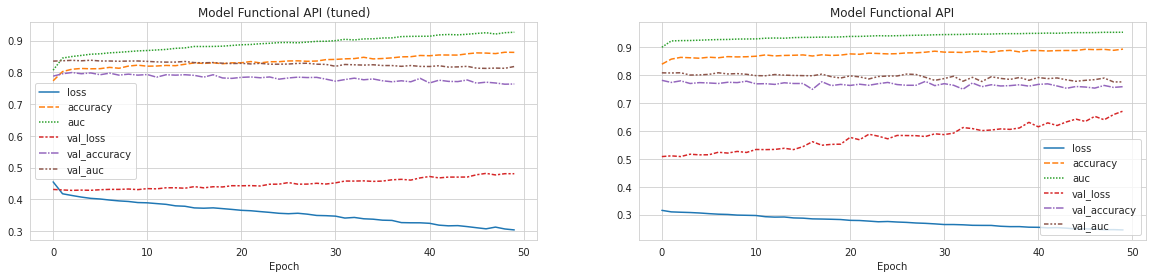

In [ ]:
# Show the training graph
D = pd.DataFrame(history_func_2.history)

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Model Functional API (tuned)')
sns.lineplot(data=D)
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.title('Model Functional API')
sns.lineplot(data=B)
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Evaluate model on test data
m4_loss, m4_accu, m4_auc = model4.evaluate((X_test_A, X_test_B), (y_test, y_test))

17/17 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7951 - auc: 0.8279


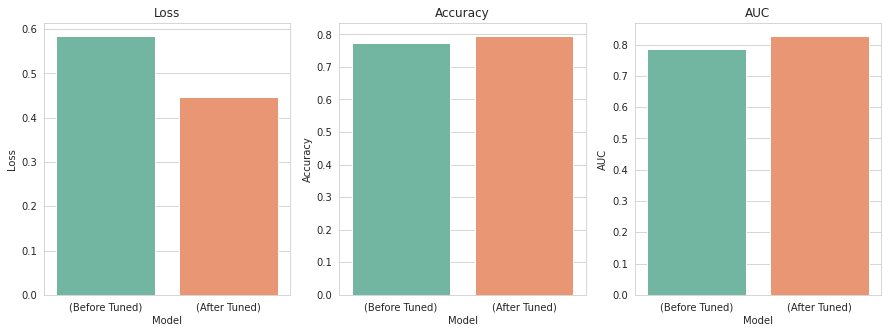

In [ ]:
# Improvement on Functional API Model
imp2 = pd.DataFrame({'Model' : ["(Before Tuned)", "(After Tuned)"],
                      'Loss' : [m2_loss, m4_loss],
                      'Accuracy' : [m2_accu, m4_accu],
                      'AUC' : [m2_auc, m4_auc]})

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Loss')
sns.barplot(data=imp2, x='Model', y='Loss', palette='Set2')
plt.subplot(1,3,2)
plt.title('Accuracy')
sns.barplot(data=imp2, x='Model', y='Accuracy', palette='Set2')
plt.subplot(1,3,3)
plt.title('AUC')
sns.barplot(data=imp2, x='Model', y='AUC', palette = 'Set2')
plt.show()

The functional API model has better improvements. The loss is getting lower and the accuracy and auc scores are getting higher

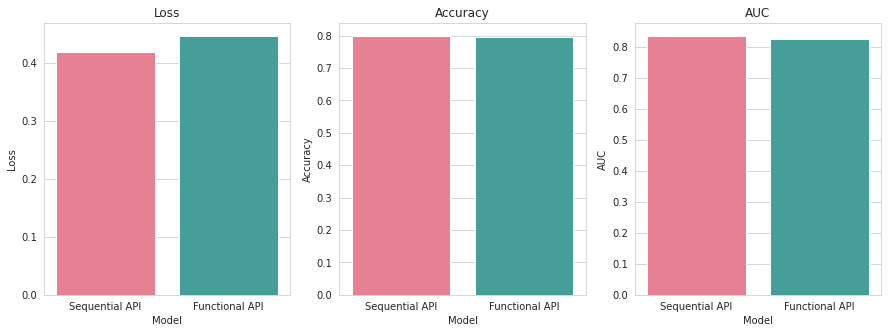

In [ ]:
# Evaluation 2
eval2 = pd.DataFrame({'Model' : ["Sequential API", "Functional API"],
                      'Loss' : [m3_loss, m4_loss],
                      'Accuracy' : [m3_accu, m4_accu],
                      'AUC' : [m3_auc, m4_auc]})

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Loss')
sns.barplot(data=eval2, x='Model', y='Loss', palette='husl')
plt.subplot(1,3,2)
plt.title('Accuracy')
sns.barplot(data=eval2, x='Model', y='Accuracy', palette='husl')
plt.subplot(1,3,3)
plt.title('AUC')
sns.barplot(data=eval2, x='Model', y='AUC', palette='husl')
plt.show()

Now if we compared the Sequential API and functional API model after tuning, the sequential model reached the lowest loss score and slightly higher score on accuracy and AUC. Therefore, we will select the Sequential API model to be the best model.

In [ ]:
# Save the model
model.save("my_keras_model.h5")

# Model Inference

For model inference, let's just take a random one data from the existing dataset earlier

In [ ]:
dummy = X.sample(1)
dummy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,x0_Bank transfer (automatic),x0_Credit card (automatic),x0_Electronic check,x0_Mailed check,x1_Month-to-month,x1_One year,x1_Two year,x2_DSL,x2_Fiber optic,x2_No
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,
4895-TMWIR,1,1,1,0,11,1,0,0,0,0,0,0,0,0,19.95,214.75,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Load the saved model
best_model = keras.models.load_model("my_keras_model.h5")

In [ ]:
# Predict the dummy data
best_model.predict(dummy).round(0)

array([[0.]], dtype=float32)

The model predict that the customer in dummy data will stay

# Conclusion

1. From the dataset, we did some cleaning and preprocessing like erasing the duplicated data, drop the missing value, and reassuring the data type of each features.
2. From the exploration data analysis, we have some insights that :
    - Many customers with high monthly charges are tend to switch to another service provider (churn)
    - Most of the customers have short-term contracts with the services, and these customers tend to churn compared to the customers with long-term contract
    - From all customers, around 16% of them are senior citizen. Most of them are more loyal compared to the young citizen
    - The old customers are more loyal rather than the new customers
    - The customers with internetService option fiber optic has the highest churn rate compared to other options
3. Before the model training process, we pre-process the features with some functions that already put inside the pipeline such as data encoding and data scaling. We also split the data into 3 parts, train data, validation data, and training data.
4. We use 2 kinds of model to perform the Artificial Neural Network Algorithm :
    - Sequential API Model
    - Functional API Model
5. After the first training, we evaluate the model to the test data, then we get Sequential API Model as the best model as it had the lowest loss score and highest accuracy and auc score
6. After we tune the parameter for each model, the functional API model improved better. However, it's score is still not as good as Sequential API model (Functional API got highest loss score and slightly lower accuracy and auc score). Therefore, we chose the Sequential API Model as the best model to help predict and improve the performance of customer retention for the Telco company.
